In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('G:/Cardata/cardata.csv')

In [3]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
print(df['Seller_Type'].unique())
print(df['Fuel_Type'].unique())
print(df['Owner'].unique())

['Dealer' 'Individual']
['Petrol' 'Diesel' 'CNG']
[0 1 3]


In [5]:
#no missing values 

In [6]:
#feature like year or date
#will create the year based on 2022 since to find out how old the car model

In [7]:
#no need of car name
df_final=df.drop('Car_Name', axis=1)

In [8]:
df_final.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df_final['current year']=2020

In [10]:
df_final

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,current year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020
...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0,2020
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0,2020
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0,2020
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0,2020


In [12]:
df_final['car old in yrs']=df_final['current year']-df_final['Year']

In [15]:
#droping year and current year
df_final.drop(['Year','current year'],axis=1, inplace=True)

In [16]:
df_final.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,car old in yrs
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [20]:
#handling categorical features
#by getting dummies variables or on hot encoded
#first columns always drop  to preven from dummy variable trap

In [18]:
df_final=pd.get_dummies(df_final, drop_first=True)

In [19]:
df_final.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,car old in yrs,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,0,1,0,1
1,4.75,9.54,43000,0,7,1,0,0,1
2,7.25,9.85,6900,0,3,0,1,0,1
3,2.85,4.15,5200,0,9,0,1,0,1
4,4.60,6.87,42450,0,6,1,0,0,1


In [24]:
import seaborn as sns

<AxesSubplot:>

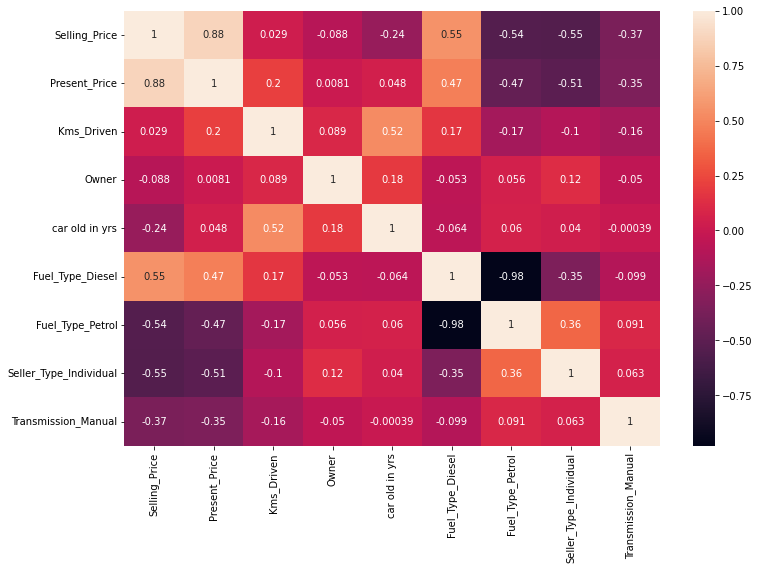

In [32]:
plt.figure(figsize=(12,8))
sns.heatmap(df_final.corr(), annot=True)

In [33]:
X=df_final.drop('Selling_Price', axis=1)
y=df_final['Selling_Price']

In [45]:
#feature importnace or check feture importance order or value
from sklearn.ensemble import ExtraTreesRegressor
model=ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [53]:
model.feature_importances_

array([3.97713584e-01, 3.90372525e-02, 3.00623277e-04, 8.00814659e-02,
       2.02769358e-01, 2.09088841e-02, 1.35339605e-01, 1.23849227e-01])

In [62]:
model.feature_importances_

array([3.97713584e-01, 3.90372525e-02, 3.00623277e-04, 8.00814659e-02,
       2.02769358e-01, 2.09088841e-02, 1.35339605e-01, 1.23849227e-01])

In [63]:
pd.Series(model.feature_importances_, index=X.columns)

Present_Price             0.397714
Kms_Driven                0.039037
Owner                     0.000301
car old in yrs            0.080081
Fuel_Type_Diesel          0.202769
Fuel_Type_Petrol          0.020909
Seller_Type_Individual    0.135340
Transmission_Manual       0.123849
dtype: float64

In [65]:
feature_importances=pd.Series(model.feature_importances_, index=X.columns)

<AxesSubplot:>

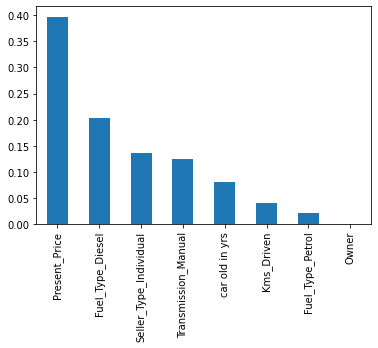

In [67]:
feature_importances.nlargest(10).plot(kind='bar')

In [68]:
#train test split

In [69]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state =20)

In [73]:
#implement ML model
#why we use Random forest no need to scale the data
#it also uses for hyer parmater tuning

In [72]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [97]:
##hyper paramters used for random forest
n_estimators=[int(x) for x in np.linspace(start=100, stop=1200, num=12)]
max_features=['sqrt','log2','auto']
max_depth=[int(x) for x in np.linspace(5,30 ,num=6)]
min_samples_split=[2,5,10,20,80,100]
min_samples_leaf=[1,2,4,5,9]

In [80]:
#random and  grid serach help us to find out best parameters for random forst that called hyper parameter tuning

In [81]:
from sklearn.model_selection import RandomizedSearchCV  #its fatser than grid search 

In [99]:
#create random_grid
random_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
             'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [100]:
from sklearn.metrics import mean_squared_error

In [105]:
#verboes used for displaying the values
#n_jobs all the laptop course 

In [101]:
rfr = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10,n_jobs=1,verbose=2, cv=5,random_state=0)

In [102]:
rfr.fit(X,y)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=100, n_estimators=900; total time=   1.2s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=100, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=100, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=100, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=100, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 4, 5, 9],
                                        'min_samples_split': [2, 5, 10, 20, 80,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [103]:
rfr.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=100, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=100, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=100, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=100, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=4, min_samples_split=100, n_estimators=900; total time=   1.1s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_estimators=400; total time=   0.5s
[CV] END max_depth=15, max_features=log2, min_samples_leaf=2, min_samples_split=5, n_esti

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['sqrt', 'log2',
                                                         'auto'],
                                        'min_samples_leaf': [1, 2, 4, 5, 9],
                                        'min_samples_split': [2, 5, 10, 20, 80,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=0, scoring='neg_mean_squared_error', verbose=2)

In [106]:
 rfr.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 15}

In [107]:
#now we wil create model using above parametrs ofor rando classifier

In [125]:
rf=RandomForestRegressor(n_estimators=400,
 min_samples_split=5,
 min_samples_leaf=2,
 max_features='log2',
 max_depth=15)

In [127]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=15, max_features='log2', min_samples_leaf=2,
                      min_samples_split=5, n_estimators=400)

In [129]:
pred=rf.predict(X_test)

C:\Users\GOPINATH V GOWDA\anaconda3\envs\gopicar\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

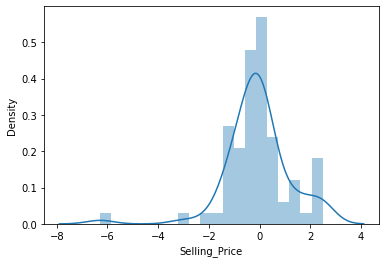

In [130]:
sns.distplot(y_test-pred)

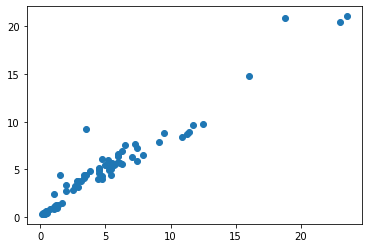

In [120]:
plt.scatter(y_test, pred)

In [121]:
#verboes to show the details

In [131]:
#tosave this model in local we do pickle

In [132]:
import pickle

In [136]:
#open a file whare you want to save the data
file=open('G:/Cardata/random forst reg model.pkl', 'wb')

#dump information to the file
pickle.dump(rf,file)

In [ ]:
#to create requirement txt file
#goto location in anaconda cmd
